In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_excel('/content/data.xlsx')
df.sample(20)

,Unnamed: 0,hotel,star,review,date,length
1264,1265,노보텔 앰배서더 서울 용산,5,침대 컨디션이 굉장히 좋더라고요 간만에 꿀잠 자고 왔습니다,2020. 04. 27,32
1069,1070,노보텔 앰배서더 서울 용산,4,전체적으로 만족 예약이외의 부분은 조금 비싸네요,2020. 06. 06,26
816,817,노보텔 앰배서더 서울 용산,5,용산역에서 가까워서 좋구수영장도작지만 딱 좋았음룸컨디션도 괜찮은 편,2020. 07. 15,37
285,285,노보텔 앰배서더 서울 용산,5,깨끗하고 좋았어요,2020. 10. 15,9
1323,1324,노보텔 앰배서더 서울 용산,5,저녁에 와인 바스킷이 필요해서 부탁드렸더니 얼음 넣어서 주시고 엄청 친절하셨어요,2020. 04. 14,44
990,991,노보텔 앰배서더 서울 용산,5,럭셔리함 아주좋음,2020. 06. 17,9
402,402,노보텔 앰배서더 서울 용산,5,들어가자마자 머리카락이있었지만 온수가잘나오고 편안합니다 코로나로인해 호텔말고는 이용...,2020. 09. 17,103
1840,1842,노보텔 앰배서더 서울 용산,5,잘쉬다갑니다,2019. 10. 29,6
1109,1110,노보텔 앰배서더 서울 용산,5,편안하게 잘쉬다갑니다,2020. 05. 30,11
1968,1970,노보텔 앰배서더 서울 용산,4,좋아요,2019. 07. 20,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2240 non-null   int64 
 1   hotel       2240 non-null   object
 2   star        2240 non-null   int64 
 3   review      2214 non-null   object
 4   date        2240 non-null   object
 5   length      2240 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 105.1+ KB


In [6]:
df.drop(['Unnamed: 0','date','hotel'], axis=1, inplace =True)

In [7]:
df.head()

,star,review,length
0,5,역시 시설도 깨끗하고 좋았어요친절했구요,21
1,4,되게좋앗어요,6
2,5,방도 깨끗하고 위치도 좋았습니다,17
3,4,가성비도 좋고 분위기가 좋아요,16
4,3,안녕하세요,5


<AxesSubplot:title={'center':'STAR'}>

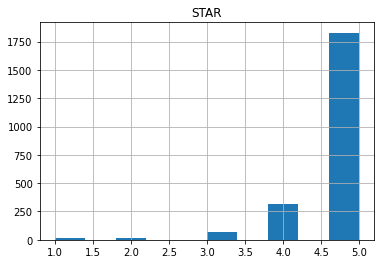

In [8]:
plt.title('STAR')
df['star'].hist()

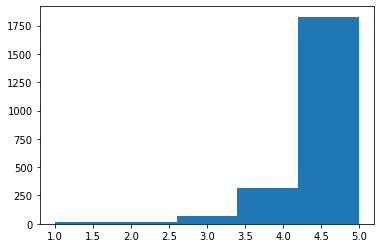

In [9]:
plt.hist(df['star'],bins = 5)
plt.show()

In [10]:
def rating_to_label(rating):
    if rating > 4:
        return 1
    else:
        return 0
    
df['label'] = df['star'].apply(lambda x: rating_to_label(x))

In [11]:
df.head()

,star,review,length,label
0,5,역시 시설도 깨끗하고 좋았어요친절했구요,21,1
1,4,되게좋앗어요,6,0
2,5,방도 깨끗하고 위치도 좋았습니다,17,1
3,4,가성비도 좋고 분위기가 좋아요,16,0
4,3,안녕하세요,5,0


In [12]:
def cleanText(readData):
    text = re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》❤]', '', readData)
    return text

def cleanText2(readData):
    text = re.sub('[ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅃㅉㄸㄲㅆㅛㅕㅑㅐㅔㅗㅓㅏㅣㅜㅠㅡ]', '', readData)
    return text

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   star    2240 non-null   int64 
 1   review  2214 non-null   object
 2   length  2240 non-null   int64 
 3   label   2240 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 70.1+ KB


In [14]:
df['review']=df['review'].astype('str')
df['review'] = df['review'].apply(lambda x: x.replace('\n',''))
df['review'] = df['review'].apply(cleanText)
df['review'] = df['review'].apply(cleanText2)
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['review'] = df['review'].str.replace('^ +', "")
df['review'].replace('', np.nan, inplace=True)
df = df.dropna(how = 'any')
df['length'] = df['review'].apply(lambda x: len(x))

In [15]:
df2 = df.loc[0:1, :]

In [16]:
df2['review'] = ['어떡해하는건지 모르겠네진짜로 a....머리아파','리뷰데이터를 정제하는건! 어렵다']

In [17]:
df2

,star,review,length,label
0,5,어떡해하는건지 모르겠네진짜로 a....머리아파,21,1
1,4,리뷰데이터를 정제하는건! 어렵다,6,0


In [18]:
df2['review']=df2['review'].astype('str')
df2['review'] = df2['review'].apply(lambda x: x.replace('\n',''))
df2['review'] = df2['review'].apply(cleanText)
df2['review'] = df2['review'].apply(cleanText2)
df2['review'] = df2['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df2['review'] = df2['review'].str.replace('^ +', "")
df2['review'].replace('', np.nan, inplace=True)
df2 = df2.dropna(how = 'any')
df2['length'] = df2['review'].apply(lambda x: len(x))

In [19]:
df2

,star,review,length,label
0,5,어떡해하는건지 모르겠네진짜로 머리아파,20,1
1,4,리뷰데이터를 정제하는건 어렵다,16,0


In [20]:
%cd /content/drive/MyDrive/colab/py-hanspell-master/py-hanspell-master

!python setup.py install

/content/drive/MyDrive/colab/py-hanspell-master/py-hanspell-master
/usr/local/lib/python3.9/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  warnings.warn(
running install
running bdist_egg
running egg_info
writing py_hanspell.egg-info/PKG-INFO
writing dependency_links to py_hanspell.egg-info/dependency_links.txt
writing requirements to py_hanspell.egg-info/requires.txt
writing top-level names to py_hanspell.egg-info/top_level.txt
reading manifest file 'py_hanspell.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'py_hanspell.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/hanspell
copying build/lib/hanspell/spell_checker.py -> build/bdist.linux-x86_64/egg/hanspell
copying bui

In [21]:
from hanspell import spell_checker
def spell_check(document):
    result = spell_checker.check(document)
    return result.checked

In [22]:
df2['review_spell_check'] = df2['review'].apply(spell_check)

In [23]:
df2

,star,review,length,label,review_spell_check
0,5,어떡해하는건지 모르겠네진짜로 머리아파,20,1,어떻게 하는 건지 모르겠네 진짜로 머리 아파
1,4,리뷰데이터를 정제하는건 어렵다,16,0,리뷰 데이터를 정제하는 건 어렵다


In [116]:
new = []
for sentence in tqdm(df2['review_spell_check']):
    tokenized_sentence = okt.morphs(sentence, stem=True, norm = True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    new.append(stopwords_removed_sentence)

100%|██████████| 2/2 [00:00<00:00, 280.01it/s]


In [117]:
new

[['어떻다', '하다', '건지다', '모르다', '진짜', '로', '머리', '아프다'],
 ['리뷰', '데이터', '를', '정제', '하다', '건', '어렵다']]

In [24]:
df['review']=df['review'].astype('str')
df['review_spell_check'] = df['review'].apply(spell_check)

In [ ]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [26]:
from collections import Counter
from konlpy.tag import Okt, Mecab

okt = Okt()

In [27]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()


In [30]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split

In [31]:
train, test = train_test_split(df,test_size=0.2, random_state=42)

In [118]:
X_train = []
for sentence in tqdm(train['review_spell_check']):
    tokenized_sentence = okt.morphs(sentence, stem=True, norm = True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 1764/1764 [00:15<00:00, 115.18it/s]


In [33]:
print(X_train[:3])

[['좋다'], ['방이', '생각', '보다', '작다'], ['좋다']]


In [119]:
hotel_stopwords = ['호텔', '도']
for word in hotel_stopwords:
    stopwords.append(word)

In [120]:
X_train = []
for sentence in tqdm(train['review_spell_check']):
    tokenized_sentence = okt.morphs(sentence, stem=True, norm = True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 1764/1764 [00:17<00:00, 102.98it/s]


In [36]:
print(X_train[:3])

[['좋다'], ['방이', '생각', '보다', '작다'], ['좋다']]


In [121]:
X_test = []
for sentence in tqdm(test['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True, norm = True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 442/442 [00:05<00:00, 81.00it/s]


In [112]:
corpus = "".join(df['review_spell_check'].tolist())
corpus

'어떻게 하는 건지 모르겠네 진짜로 머리 아파리뷰 데이터를 정제하는 건 어렵다방도 깨끗하고 위치도 좋았습니다구성비도 좋고 분위기가 좋아요안녕하세요좋았어요시설이 깔끔하고 좋았어요세면대에서 하수구 냄새가 올라오고 커튼에 먼지도 좀 심해서 실망스러웠지만 대체로 만족했습니다침대 개조시간 되면 다음에 꼭 다시 방문할 예정입니다방음이 좀 약하지만 항상 잘 쉬다 갑니다 가습기도 요청드려서 키고 잤어요 방은 정말 깨끗하고 포건 했습니다 직원들 다 친절하고 조식도 깔끔하고 하나같이 신경 쓴 게 느껴집니다 맛있어요 코로나 때문에 운영 안되는 곳이 많아 아쉽네요역이랑 가까워서 좋았어요 호캉스하기 좋아요지하철역 바로 앞에 있어서 교통이 너무 좋고 좋았어요깔끔합니다엄청 깨끗하고 시 반에 갔는데도 얼리 체크인이 돼서 좋았어요괜찮았어요잘 쉬다 갑니다잘 지내다 갑니다룸 컨디션 좋고요 방음 좋고요 안 좋은 거만 참고하면 될듯합니다 작은 수건에서 찜질방 수건 냄세났어요 다른 건 싹 다 좋습니 디 더 보기처음 입실했을 때 입실시간보다 더 늦게 입실했는데도 작업 중이라 많이 당황했는데 직원분의 대처가 너무 좋았네요 하루 종일 불쾌할뻔했었는데 바로 객실 바꿔주시고 직원분들도 전체적으로 친절하시네요 추천입니다박 끊고 출근 때문에 당일로만 이용한 게 아쉬워요 생각보다 괜찮아서 놀랬어요 룸 컨디션도 좋고 컨시어지 직원분도 친절하시고 체크아웃 하면서 주위에 또 예약하려고요너무 친절하시고 깨끗하고 좋았습니다잘 쉬고 가요 옆방 문 닫힐 때 나는 소리가 조금 크게 들리긴 했지만 괜찮았어요 칫솔 머리끈은 구비되어있지 않아서 미리 챙겨가면 좋을 것 같네요굿나이트 하세요아이와 주말에  환상적인 뷰와  좋은 침대 그리고 저렴한 가격에 친절하게 깨끗하게 너무 잘 놀다가 갑니다 집에만 있어서 답답해했는데 너무 좋았어요 또 올게요 친절한 직원분들도 인상에 남고 최고였습니다 그리고 다녀가시는 손님분들 매너 있게 행동하셔야 또 다른 친절로 온다는 걸 기억하고 가시길 바라요 친절을 논하기 전에 본인들의 행실이 매너 있었는지 생

In [113]:
nouns = okt.nouns(corpus)
print(nouns)

['진짜', '머리', '리뷰', '데이터', '정제', '건', '다방', '위치', '비도', '분위기', '시설', '세면대', '하수', '구', '냄새', '커튼', '먼지', '좀', '실망', '대체로', '침대', '개조', '시간', '다음', '꼭', '다시', '방문', '예정', '방음', '좀', '항상', '쉬', '가습기', '요청', '키', '방', '정말', '포건', '직원', '조식', '신경', '게', '코로나', '때문', '운영', '곳', '요역', '호캉스', '지하철역', '바로', '앞', '교통', '시', '반', '체크', '쉬', '갑', '다룸', '컨디션', '방음', '안', '거만', '참고', '수건', '찜질방', '수건', '다른', '건', '싹', '습', '디', '더', '보기', '처음', '입실', '때', '입실', '시간', '더', '입실', '작업', '중이', '당황', '직원', '대처', '하루', '종일', '바로', '객실', '직원', '전체', '추천', '박', '출근', '때문', '일로', '이용', '게', '생각', '룸', '컨디션', '컨시어', '직원', '체크아웃', '주위', '또', '예약', '쉬', '가요', '옆방', '문', '때', '나', '소리', '조금', '크게', '칫솔', '머리', '끈', '구비', '미리', '것', '굿나이트', '아이', '주말', '환상', '뷰', '침대', '가격', '집', '또', '직원', '인상', '남고', '최고', '손님', '매너', '행동', '또', '다른', '친절', '걸', '기억', '친절', '논', '전', '본인', '행실', '매너', '생각', '동네', '마트', '온', '것', '구', '행동', '보기', '더', '보기', '청결', '그', '자체', '다트', '윈', '배드', '거', '쿠폰', '사용', '방문', '룸', '업그레이드', '

In [40]:
# print(df.isna().sum())

In [114]:
counter = Counter(nouns)

In [115]:
counter.most_common(10)

[('호텔', 171),
 ('시설', 162),
 ('이용', 159),
 ('뷰', 153),
 ('쉬', 149),
 ('정말', 134),
 ('직원', 133),
 ('것', 133),
 ('객실', 122),
 ('침대', 118)]

In [43]:
# df['tokens'] = X_train

In [44]:
# df.head()

In [45]:
# stop_words = ['나','여기','무엇','그것','가','긋','가본','제','저','저희','그거','브','우리','그','큐티','쏘','슈','어디','뭐','자기','놀자','이곳','임','요방','너','그곳','거기','니티','노','이쪽','저기','호텔','곳','점','앞','시','원분','스로','도','대','플','기','그제','넥','딩','놀']
# def getNVM_lemma(text):
#     tokenizer = MeCab.Tagger()
#     parsed = tokenizer.parse(text)
#     #print(parsed)
#     word_tag = [w for w in parsed.split("\n")] 
#     pos = []
#     tags = ["NNG", "NNP","VV","VA","VCP",'VCN','XR']
   
#     for word_ in word_tag[:-2]:
#         word = word_.split('\t') #['아버지', 'NNG,*,F,아버지,*,*,*,*']
#         tag = word[1].split(",")  #['EC', '*', 'F', '는다', '*', '*', '*', '*']
#         if('+' in tag[0]): #단어가 여러 형태소로 구성된 경우
#             if ('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
#                 t = tag[-1].split('/')[0]
#                 if t not in stop_words:
#                     pos.append(t)
#         elif ((tag[0] in tags) and (word[0] not in stop_words)):
#             pos.append(word[0])
#     return pos

In [46]:
import konlpy
from konlpy.tag import Komoran

In [47]:
import MeCab

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.layers import Dense, Activation

In [49]:
# cv = CountVectorizer(min_df = 0, tokenizer = getNVM_lemma , stop_words = stop_words, preprocessor = None, lowercase = False,ngram_range = (1,2))
# dtm = cv.fit_transform(df['review'])

In [50]:
# x = dtm.toarray()
# y = df['label']

In [51]:
# review_len = np.array(df.length).reshape(-1,1)
# x = np.hstack((x, review_len))

In [52]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
# cv.tokenizer = None


In [54]:
# x_train.shape,y_train.shape, x_test.shape, y_test.shape

In [55]:
import tensorflow as tf

In [56]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,  #y자체는 열이 하나
#           input_shape = (9999, ), #input data는 shape 크기에 맞추기
#           activation = 'sigmoid',
#           kernel_regularizer = tf.keras.regularizers.l1_l2(0, 0.001) #ㅣ1은 0만, l2는 0.001만 : 이때가 제일 정확도 높음
#          ))
# model.summary()

In [57]:
# model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [58]:
# model.fit(x_train, y_train.values, epochs=100, validation_split=0.1,
#          callbacks=[tf.keras.callbacks.EarlyStopping()])

In [59]:
# model.evaluate(x_test, y_test.values, verbose=0) #손실, accuracy

In [60]:
# prob=model.predict(
#     x_test,
#     batch_size=None,
#     verbose=0,
#     steps=None,
#     callbacks=None,
#     max_queue_size=10,
#     workers=1,
#     use_multiprocessing=False,
# )

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score

In [62]:
# predictional = np.where(prob >= 0.5, 1, 0)
# confusion_matrix(y_test,predictional)

In [63]:
# TN,FP,FN,TP=confusion_matrix(y_test,predictional).ravel()
# print(TN,FP,FN,TP)

In [64]:
# print('정확도: ',accuracy_score(y_test,predictional))
# print('정밀도: ',precision_score(y_test,predictional))

In [65]:
# prediction1 = np.where(prob >= 0.53,1,0)
# confusion_matrix(y_test,prediction1)
# TN,FP,FN,TP=confusion_matrix(y_test,prediction1).ravel()
# print(TN,FP,FN,TP)

In [66]:
# print('정확도: ',accuracy_score(y_test,prediction1))
# print('정밀도: ',precision_score(y_test,prediction1))

In [122]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [82]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [69]:
# print(tokenizer.word_index)

In [70]:
# print('단어 집합(vocabulary)의 크기 :',total_cnt)
# print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
# print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
# print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [71]:
# vocab_size = total_cnt - rare_cnt + 1

In [72]:
# tokenizer = Tokenizer(vocab_size) 
# tokenizer.fit_on_texts(X_train)
# X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

In [73]:
# print(X_train[:3])

In [74]:
# x_train, x_test = train_test_split(X_train, test_size=0.2, random_state=42)

In [75]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [76]:
y_train = np.array(train['label'])
y_test = np.array(test['label'])

In [77]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

1764
1764


리뷰의 최대 길이 : 60
리뷰의 평균 길이 : 60.0


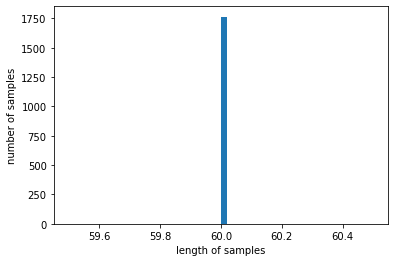

In [141]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [79]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [80]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 98.07256235827666


In [142]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 862


In [123]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [124]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [143]:
X_train

array([[  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,  87,  46, 198],
       [  0,   0,   0, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 247,  18,   1],
       [  0,   0,   0, ...,  68, 142, 173],
       [  0,   0,   0, ...,   1,  28,  36]], dtype=int32)

In [126]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
22/23 [===========================>..] - ETA: 0s - loss: 0.5070 - acc: 0.8047
Epoch 1: val_acc improved from -inf to 0.84136, saving model to best_model.h5
23/23 [==============================] - 11s 200ms/step - loss: 0.5083 - acc: 0.8037 - val_loss: 0.5814 - val_acc: 0.8414
Epoch 2/15
23/23 [==============================] - ETA: 0s - loss: 0.4848 - acc: 0.8079
Epoch 2: val_acc improved from 0.84136 to 0.84419, saving model to best_model.h5
23/23 [==============================] - 3s 150ms/step - loss: 0.4848 - acc: 0.8079 - val_loss: 0.4481 - val_acc: 0.8442
Epoch 3/15
23/23 [==============================] - ETA: 0s - loss: 0.4614 - acc: 0.8122
Epoch 3: val_acc did not improve from 0.84419
23/23 [==============================] - 4s 182ms/step - loss: 0.4614 - acc: 0.8122 - val_loss: 0.4222 - val_acc: 0.8442
Epoch 4/15
23/23 [==============================] - ETA: 0s - loss: 0.4477 - acc: 0.8228
Epoch 4: val_acc did not improve from 0.84419
23/23 [======================

In [127]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

14/14 [==============================] - 2s 72ms/step - loss: 0.4554 - acc: 0.8462

 테스트 정확도: 0.8462


In [128]:
X_train

array([[  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,  87,  46, 198],
       [  0,   0,   0, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 247,  18,   1],
       [  0,   0,   0, ...,  68, 142, 173],
       [  0,   0,   0, ...,   1,  28,  36]], dtype=int32)

In [145]:
y_pred = loaded_model.predict(X_test)

14/14 [==============================] - 1s 35ms/step


In [147]:
predictional = np.where(y_pred >= 0.5, 1, 0)

In [148]:
confusion_matrix(y_test,predictional)

array([[ 11,  65],
       [  3, 363]])

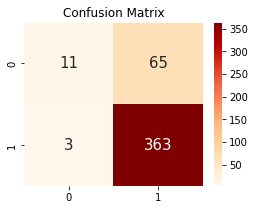

In [152]:
confu = confusion_matrix(y_test, predictional)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


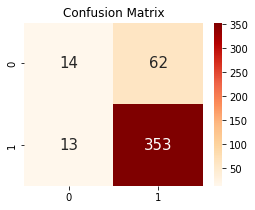

In [153]:
predictional = np.where(y_pred >= 0.7, 1, 0)
confu = confusion_matrix(y_test, predictional)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [137]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 별 5개 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 별 0~4개 리뷰입니다.\n".format((1 - score) * 100))

In [154]:
sentiment_predict('뷰가 좋았는데 화장실에서 냄새가 심하게 나네요!!..')

1/1 [==============================] - 0s 37ms/step
60.44% 확률로 별 5개 리뷰입니다.



In [139]:
sentiment_predict('주위 환경이 매우 좋고 바깥 환경과 잘 어울어지는 배경입니다.')

1/1 [==============================] - 0s 47ms/step
96.54% 확률로 별 5개 리뷰입니다.



In [140]:
sentiment_predict('냄새가 좀 나고, 침대가 삐걱거립니다..')

1/1 [==============================] - 0s 46ms/step
61.24% 확률로 별 0~4개 리뷰입니다.



In [155]:
sentiment_predict('여길 왜온거지, 다신 안 올겁니다..')

1/1 [==============================] - 0s 30ms/step
88.08% 확률로 별 5개 리뷰입니다.



In [156]:
sentiment_predict('냄새나는 곳이고 오기 싫습니다 그래도 별점은 잘 줄게요..')

1/1 [==============================] - 0s 30ms/step
83.27% 확률로 별 5개 리뷰입니다.



In [109]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

import numpy as np
import pandas as pd